# BigMart Sales Prediction


##### Anupam Agrawal(12017232)

# Introduction 

The objective is to create a model that can predict the sales per product for each store.
Using this model, BigMart will try to understand the properties of products and stores which 
play a key role in increasing sales.


### BigMart Sales Prediction practice problem

We have train (8523) and test (5681) data set, train data set has both input and output variable(s). We need to predict the sales for test data set.

Item_Identifier: Unique product ID

Item_Weight: Weight of product

Item_Fat_Content: Whether the product is low fat or not

Item_Visibility: The % of total display area of all products in a store allocated to the particular product

Item_Type: The category to which the product belongs

Item_MRP: Maximum Retail Price (list price) of the product

Outlet_Identifier: Unique store ID

Outlet_Establishment_Year: The year in which store was established

Outlet_Size: The size of the store in terms of ground area covered

Outlet_Location_Type: The type of city in which the store is located

Outlet_Type: Whether the outlet is just a grocery store or some sort of supermarket

Item_Outlet_Sales: Sales of the product in the particulat store. This is the outcome variable to be predicted.





import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
#visualiation data
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib

from scipy.stats import iqr

In [12]:
data=pd.read_csv('BigMart.csv')

In [13]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Exploratory Data Analysis (EDA)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [17]:
data.shape

(8523, 12)

In [18]:
# Count of types of data type
data.dtypes.value_counts()

object     7
float64    4
int64      1
dtype: int64

In [19]:
#Shows the names of columns present in the data set
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [20]:
#Shows the range of index
data.index

RangeIndex(start=0, stop=8523, step=1)

# Nu values in dataset

In [21]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

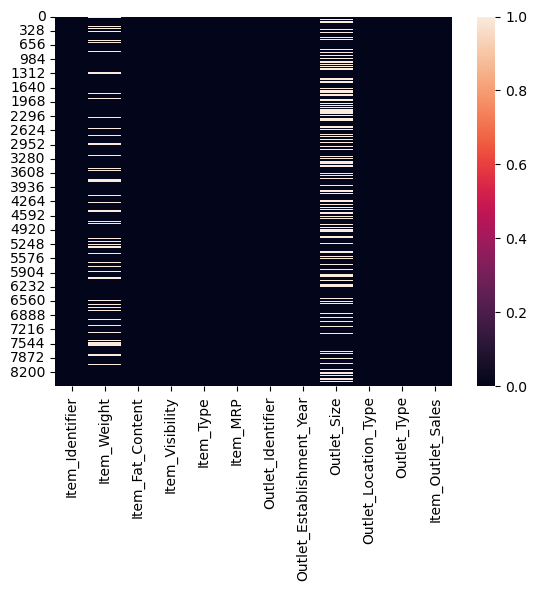

In [22]:
sns.heatmap(data.isnull())
plt.show

In [23]:
#Findind out null values in total dataset
data.isnull().sum().sum()

3873

In [24]:
#Checking for duplicates
data.duplicated().sum()

0

###### Droping out unnecessary columns:-

##### Here we are going to drop product 3 coloumn so the visualization and cleaning becomes easy.

In [25]:
## Focus on replacing missing values
data['Item_Weight'].unique()

array([ 9.3  ,  5.92 , 17.5  , 19.2  ,  8.93 , 10.395, 13.65 ,    nan,
       16.2  , 11.8  , 18.5  , 15.1  , 17.6  , 16.35 ,  9.   , 13.35 ,
       18.85 , 14.6  , 13.85 , 13.   ,  7.645, 11.65 ,  5.925, 19.25 ,
       18.6  , 18.7  , 17.85 , 10.   ,  8.85 ,  9.8  , 13.6  , 21.35 ,
       12.15 ,  6.42 , 19.6  , 15.85 ,  7.39 , 10.195,  9.895, 10.895,
        7.905,  9.195,  8.365,  7.97 , 17.7  , 19.35 ,  8.645, 15.6  ,
       18.25 ,  7.855,  7.825,  8.39 , 12.85 , 19.   ,  5.905,  7.76 ,
       16.75 , 15.5  ,  6.055,  6.305, 20.85 , 20.75 ,  8.895, 19.7  ,
        8.75 , 13.3  ,  8.31 , 19.75 , 17.1  , 10.5  ,  6.635, 14.15 ,
        8.89 ,  9.1  ,  7.5  , 16.85 ,  7.485, 11.6  , 12.65 , 20.25 ,
        8.6  , 12.6  ,  8.88 , 20.5  , 13.5  ,  7.235,  6.92 ,  8.02 ,
       12.8  , 16.6  , 14.   , 16.   , 21.25 ,  7.365, 18.35 ,  5.465,
        7.27 ,  6.155, 19.5  , 15.2  , 14.5  , 13.1  , 12.3  , 11.1  ,
       11.3  ,  5.75 , 11.35 ,  6.525, 10.3  ,  5.78 , 11.85 , 18.75 ,
      

In [26]:
data['Item_Weight'].value_counts()

12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: Item_Weight, Length: 415, dtype: int64

In [27]:
data['Item_Weight'].mode()[0]

12.15

In [28]:
## Replace the missing values with mode
data['Item_Weight']=data['Item_Weight'].fillna(data['Item_Weight'].mode()[0])

In [29]:
data['Item_Weight'].isnull().sum()

0

In [30]:
## Focus on replacing missing values
data['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [31]:
data['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [32]:
data['Outlet_Size'].mode()[0]

'Medium'

In [33]:
## Replace the missing values with mode
data['Outlet_Size']=data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0])

In [34]:
data['Outlet_Size'].isnull().sum()

0

In [35]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [37]:
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

# For removal of outliers

<AxesSubplot:xlabel='Item_Outlet_Sales'>

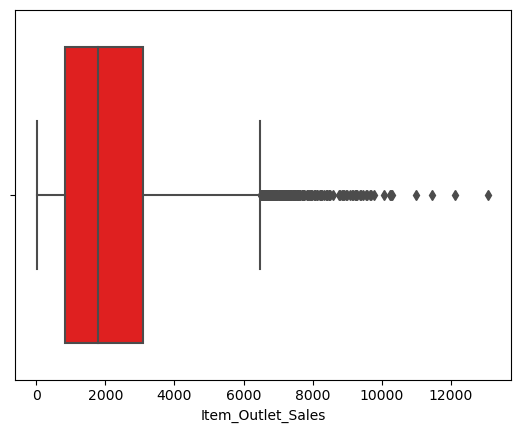

In [39]:
sns.boxplot(data.Item_Outlet_Sales, color = 'r')

In [40]:
data['Item_Outlet_Sales'].describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

In [42]:
def outliers(data, feature):
    Q1= data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    return upper_limit, lower_limit

upper, lower = outliers(data, "Item_Outlet_Sales")
print("Upper whisker: ",upper)
print("Lower Whisker: ",lower)

Upper whisker:  6501.8699
Lower Whisker:  -2566.3261


In [43]:
new_df =data[(data['Item_Outlet_Sales'] > lower) & (data['Item_Outlet_Sales'] < upper)]

In [44]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8337 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8337 non-null   object 
 1   Item_Weight                8337 non-null   float64
 2   Item_Fat_Content           8337 non-null   object 
 3   Item_Visibility            8337 non-null   float64
 4   Item_Type                  8337 non-null   object 
 5   Item_MRP                   8337 non-null   float64
 6   Outlet_Identifier          8337 non-null   object 
 7   Outlet_Establishment_Year  8337 non-null   int64  
 8   Outlet_Size                8337 non-null   object 
 9   Outlet_Location_Type       8337 non-null   object 
 10  Outlet_Type                8337 non-null   object 
 11  Item_Outlet_Sales          8337 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 846.7+ KB


<AxesSubplot:xlabel='Item_Outlet_Sales'>

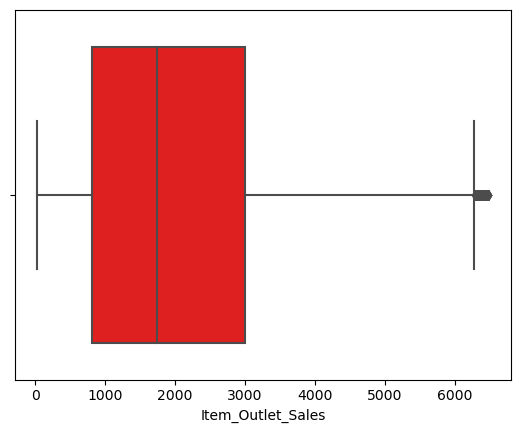

In [45]:
sns.boxplot(new_df.Item_Outlet_Sales, color = 'r')

In [46]:
new_df.shape

(8337, 12)

In [47]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8337 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8337 non-null   object 
 1   Item_Weight                8337 non-null   float64
 2   Item_Fat_Content           8337 non-null   object 
 3   Item_Visibility            8337 non-null   float64
 4   Item_Type                  8337 non-null   object 
 5   Item_MRP                   8337 non-null   float64
 6   Outlet_Identifier          8337 non-null   object 
 7   Outlet_Establishment_Year  8337 non-null   int64  
 8   Outlet_Size                8337 non-null   object 
 9   Outlet_Location_Type       8337 non-null   object 
 10  Outlet_Type                8337 non-null   object 
 11  Item_Outlet_Sales          8337 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 846.7+ KB


# Data visualization
For data visualization we are going to use two python libraries.

1.Seaborn

2.Matplotlib


# Visualize Individul Column
 Independent Variables (Categorical variables)

<Figure size 600x600 with 0 Axes>

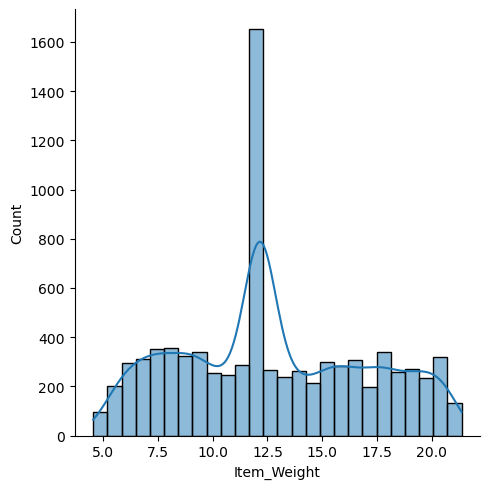

In [48]:
# Item_Weight distribution
plt.figure(figsize = (6, 6))
sns.displot(new_df['Item_Weight'], kde = True)
plt.show()

<Figure size 600x600 with 0 Axes>

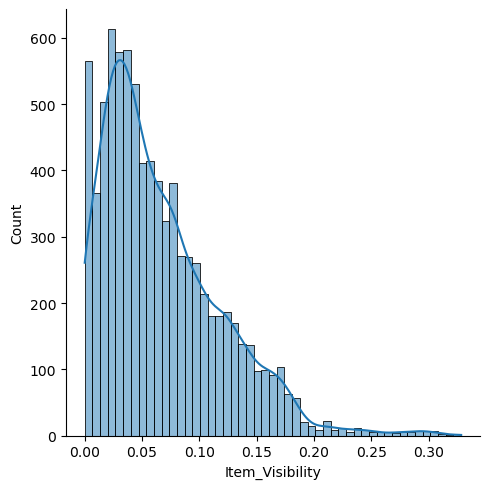

In [49]:
# Item_Visibility distribution
plt.figure(figsize = (6, 6))
sns.displot(new_df['Item_Visibility'], kde = True)
plt.show()

<Figure size 600x600 with 0 Axes>

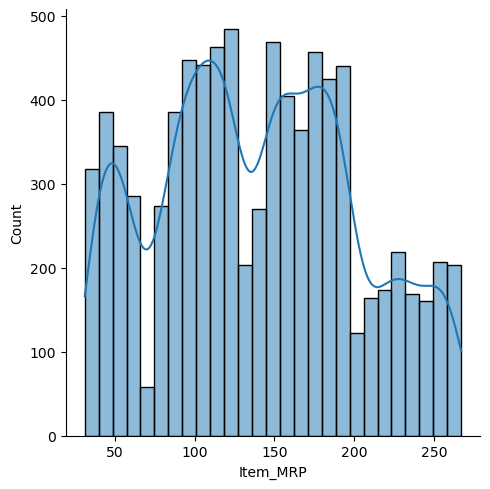

In [50]:
# Item_MRP distribution
plt.figure(figsize = (6, 6))
sns.displot(new_df['Item_MRP'], kde = True)
plt.show()

<Figure size 600x600 with 0 Axes>

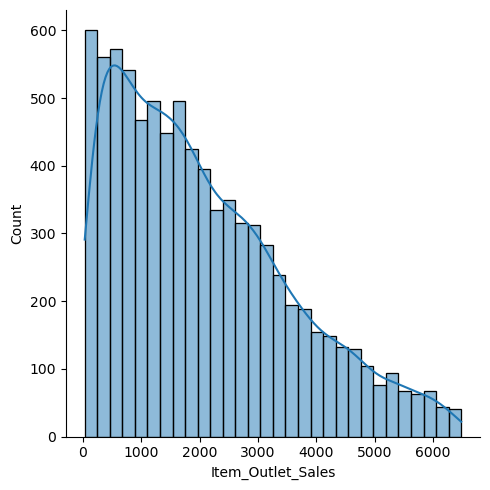

In [51]:
# Item_Outlet_Sales distribution
plt.figure(figsize = (6, 6))
sns.displot(new_df['Item_Outlet_Sales'], kde = True)
plt.show()

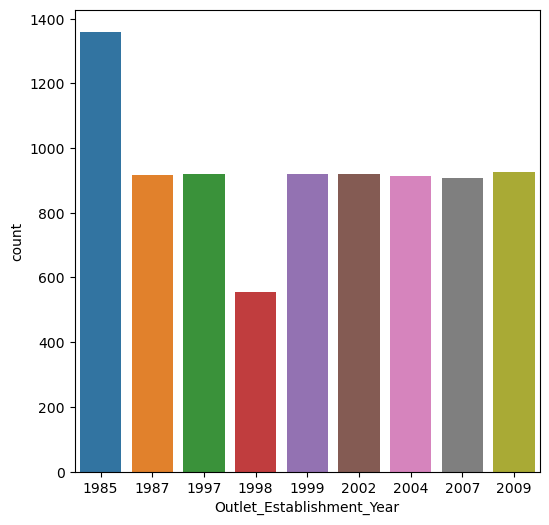

In [52]:
# Outlet_Establishment_Year column
plt.figure(figsize = (6, 6))
sns.countplot(x = 'Outlet_Establishment_Year', data = new_df)
plt.show()

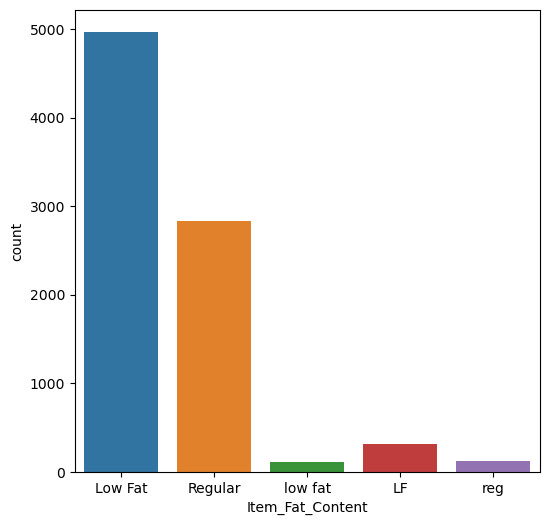

In [53]:
#CATEGORICAL FEATURES:
# Item_Fat_Content column
plt.figure(figsize = (6, 6))
sns.countplot(x = 'Item_Fat_Content', data = new_df)
plt.show()

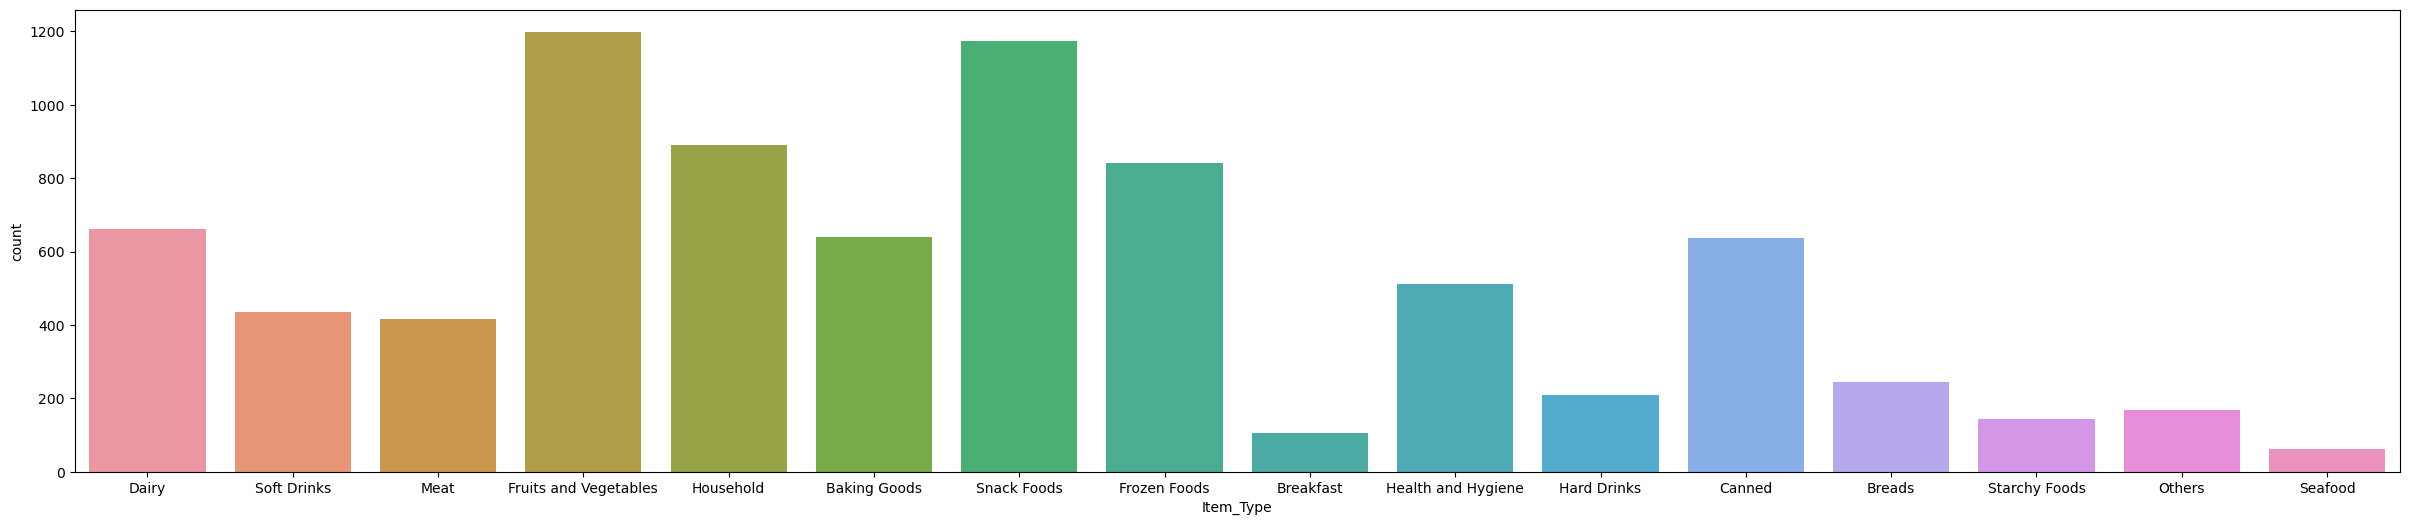

In [54]:
# Item_Type column
plt.figure(figsize = (30, 6))
sns.countplot(x = 'Item_Type', data = new_df)
plt.show()

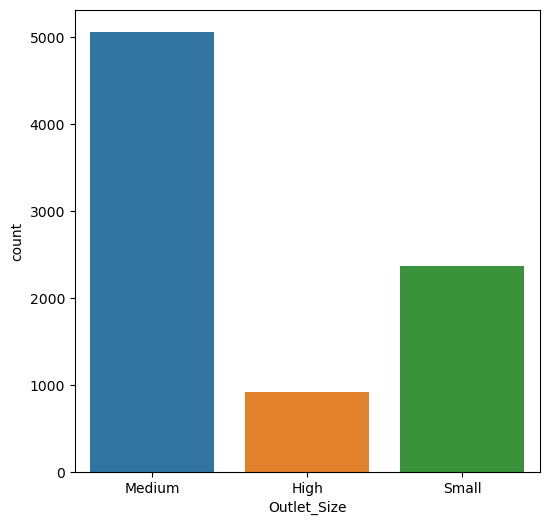

In [55]:
# Outlet_Size column
plt.figure(figsize = (6, 6))
sns.countplot(data = new_df, x = 'Outlet_Size')
plt.show()

In [56]:
#DATA PREPROCESSING
new_df['Item_Fat_Content'].value_counts()

Low Fat    4971
Regular    2827
LF          313
reg         116
low fat     110
Name: Item_Fat_Content, dtype: int64

In [57]:
new_df.replace({'Item_Fat_Content':{'low fat':'Low Fat', 'LF':'Low Fat', 'reg':'Regular'}})

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


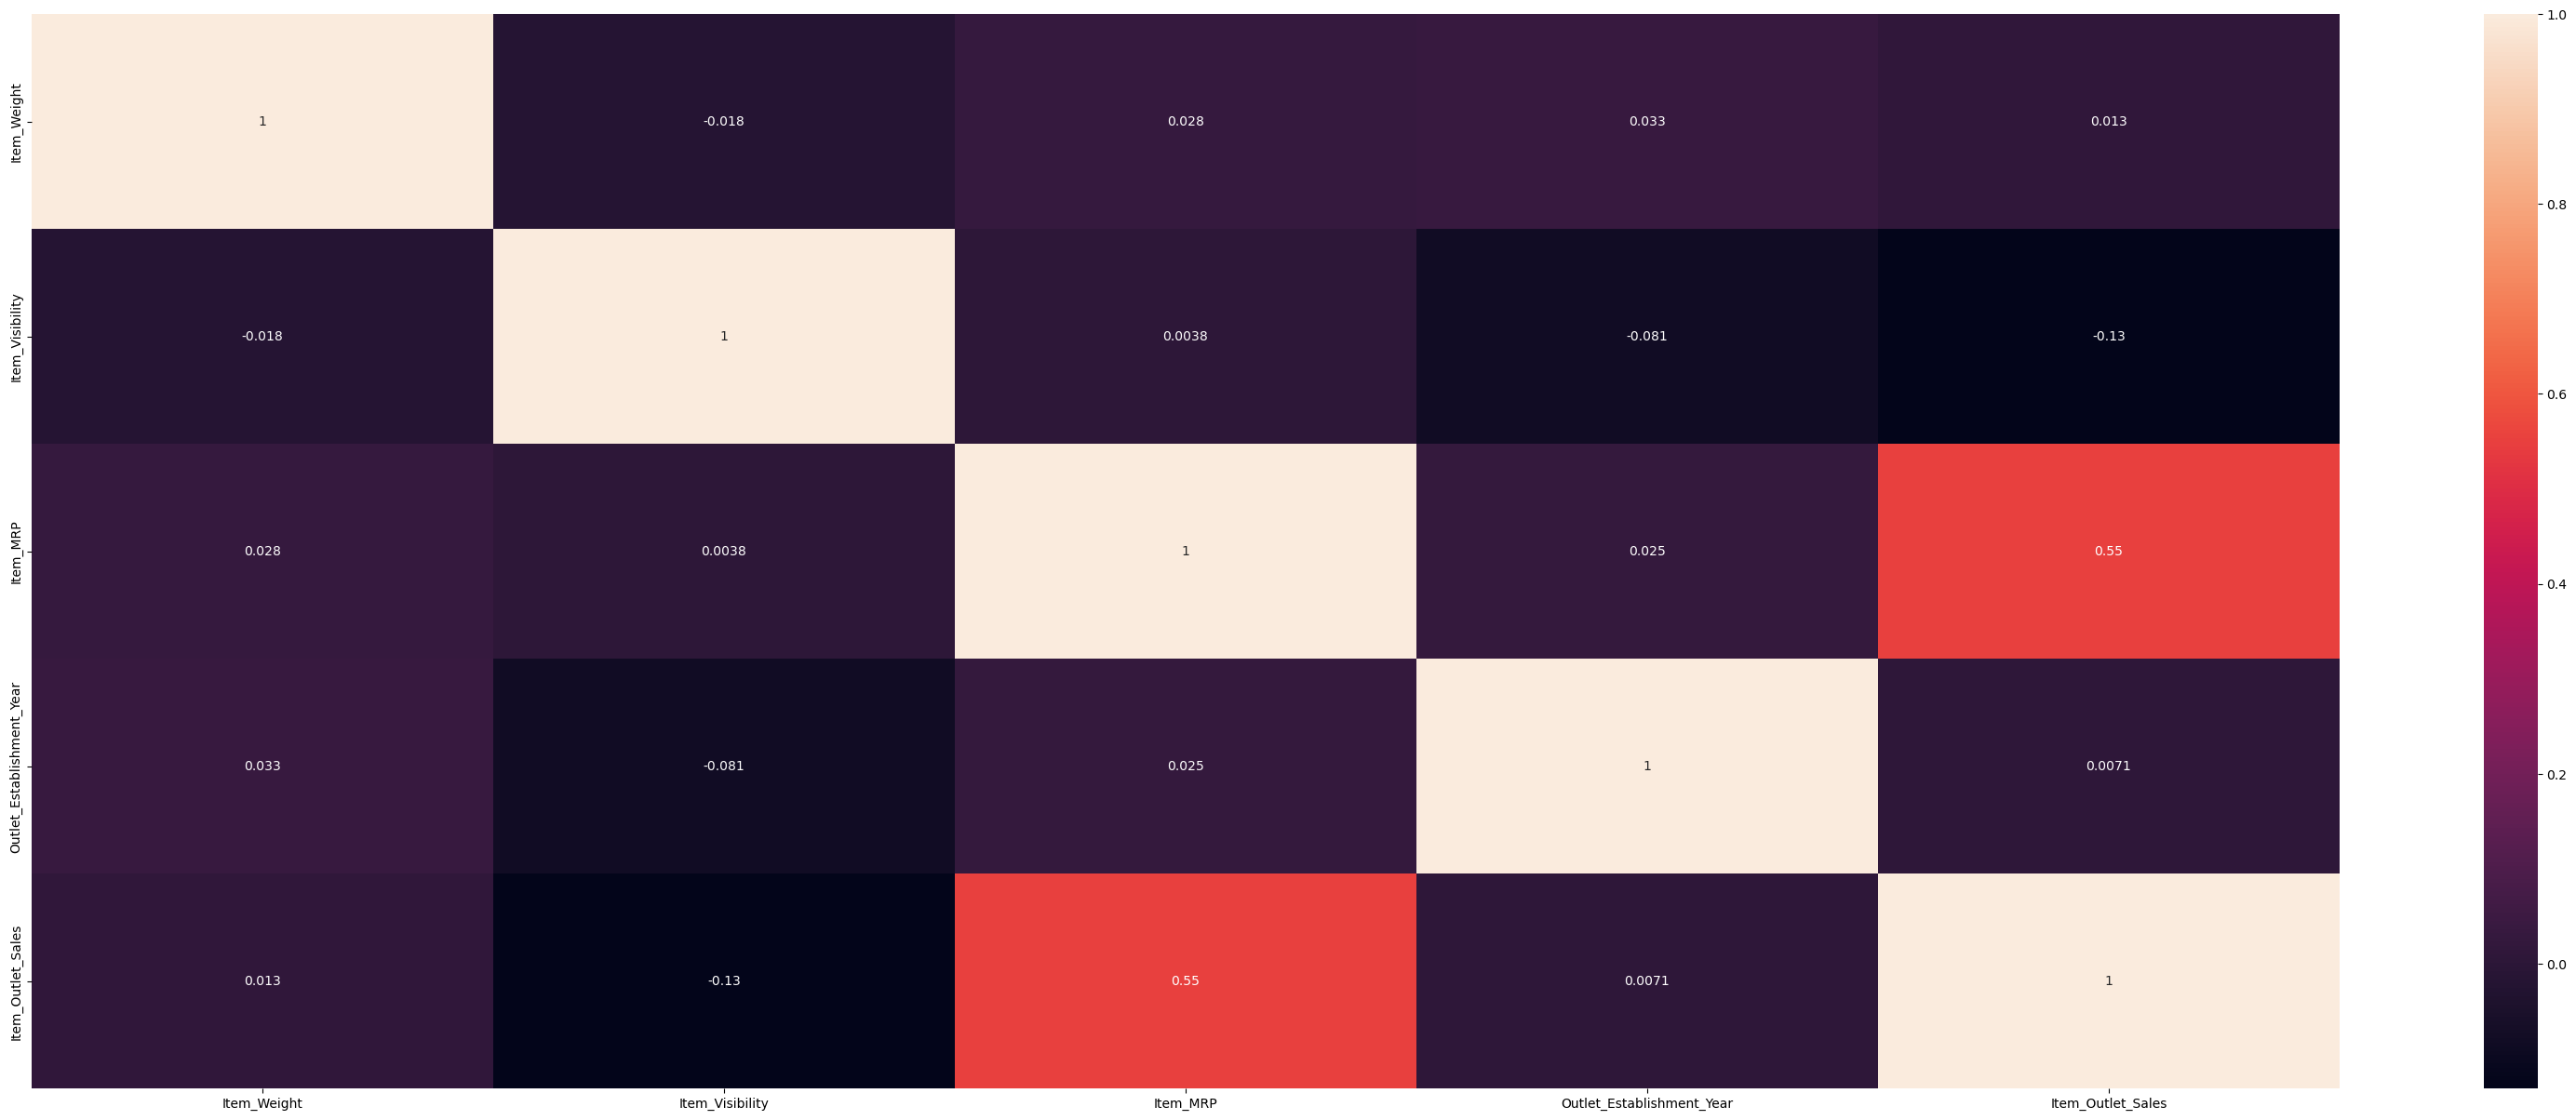

In [58]:
plt.figure(figsize =(40,15) )
sns.heatmap(new_df.corr(),annot = True)
plt.show()

Observation there is few Columns which are highly correlated to Target Variable
Item_Visibility is negatively Correlated to Target Variable 

In [59]:
data= new_df.drop(['Item_Visibility'], axis=1)

In [60]:
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


# LABEL ENCODING

In [110]:
from sklearn.preprocessing import LabelEncoder

In [111]:
encoder = LabelEncoder()

In [112]:
data['Item_Identifier'] = encoder.fit_transform(data['Item_Identifier'])
data['Item_Fat_Content'] = encoder.fit_transform(data['Item_Fat_Content'])
data['Item_Type'] = encoder.fit_transform(data['Item_Type'])
data['Outlet_Identifier'] = encoder.fit_transform(data['Outlet_Identifier'])
data['Outlet_Size'] = encoder.fit_transform(data['Outlet_Size'])
data['Outlet_Location_Type'] = encoder.fit_transform(data['Outlet_Location_Type'])
data['Outlet_Type'] = encoder.fit_transform(data['Outlet_Type'])

In [113]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,1,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,2,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,1,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,2,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.93,1,9,53.8614,1,1987,0,2,1,994.7052


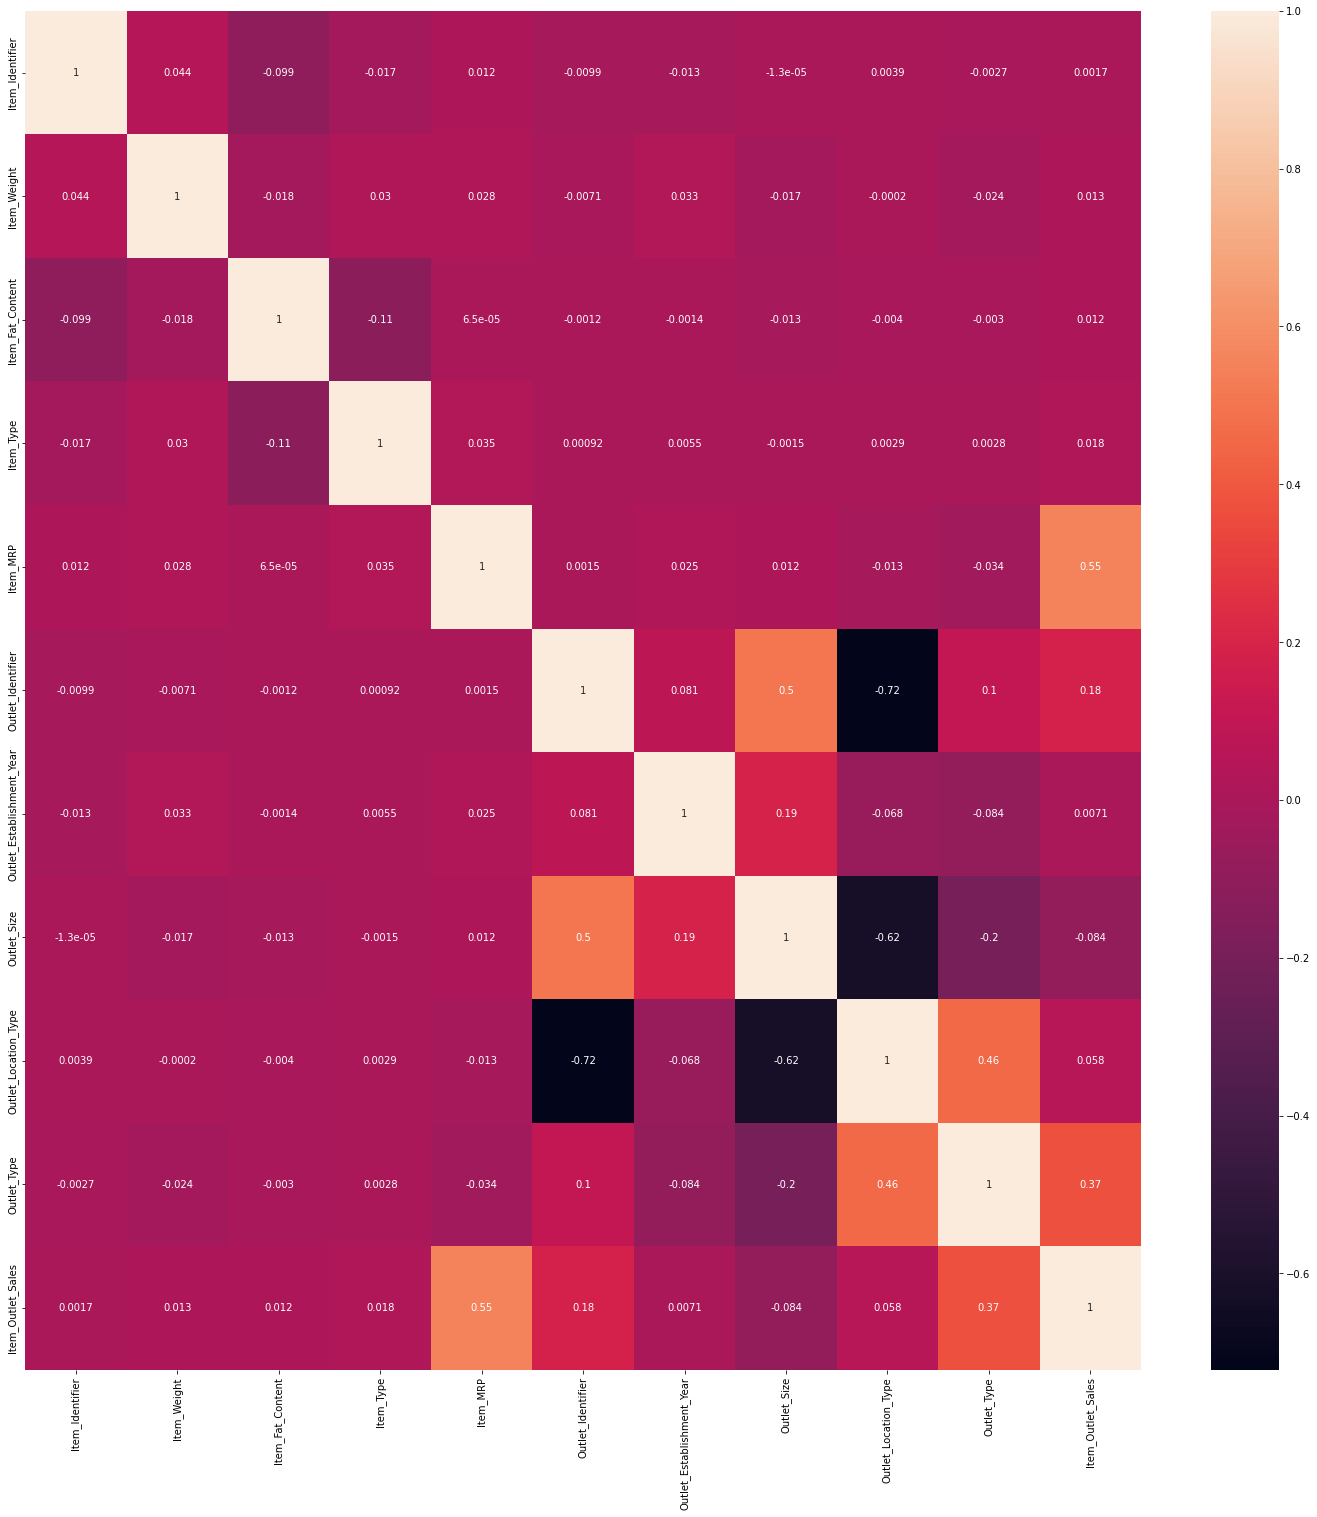

In [114]:
plt.figure(figsize =(25,25) )
sns.heatmap(data.corr(),annot = True)
plt.show()

# Test Train Split

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [62]:
X = data.drop(['Item_Outlet_Sales'], axis=1)
y = data.Item_Outlet_Sales

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [64]:
linreg = LinearRegression()

# Print out the coefficients of the model

In [65]:
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
def train(model, X, y):
    # train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)

    Cross_Validation1 = cross_validate(model, X, y, cv=5, return_train_score=True)
    CrossValidateValues2 = cross_validate(model,X,y,cv=5,scoring=('r2','neg_mean_squared_error'),return_train_score = True)
    
    print('Train Score Value : ', Cross_Validation1['train_score'])
    print('Test Score Value : ', Cross_Validation1['test_score'])
    print('*********************************************************************************************')
    print('Train MSE Value : ', CrossValidateValues2['train_neg_mean_squared_error'])
    print('Test MSE Value : ', CrossValidateValues2['test_neg_mean_squared_error'])
    print('*********************************************************************************************')
    print('Train R2 Value : ', CrossValidateValues2['train_r2'])
    print('Test R2 Value : ', CrossValidateValues2['test_r2'])
    print('*********************************************************************************************')

    # cross validation
    cv_score = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
    cv_score_r2 = cross_val_score(model, X, y, scoring='r2', cv=5)

    cv_score = np.abs(np.mean(cv_score))
    print("CV Mean Square Errors [MSE] :", cv_score)
    print("CV Root Mean Square Errors [RMSE] :", np.sqrt(cv_score))
    print("CV R2 :", np.mean(cv_score_r2))
    print('*********************************************************************************************')

    model.fit(X_train,y_train)

    y_pred = model.predict(X_test)

    MAE = mean_absolute_error(y_test, y_pred) 
    print('Mean Absolute Error Value in Model is : ', MAE)

    MSE = mean_squared_error(y_test, y_pred) 
    print('Mean Squared Error Value in Model is : ', MSE)
    
    RMSE =  np.sqrt(MSE)
    print('Root Mean Squared Error Value in Model is : ',RMSE)

    r2 = r2_score(y_test,y_pred)
    print('R2 Value in Model is : ',r2)

In [66]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
train(lr, X, y)

Train Score Value :  [nan nan nan nan nan]
Test Score Value :  [nan nan nan nan nan]
*********************************************************************************************
Train MSE Value :  [nan nan nan nan nan]
Test MSE Value :  [nan nan nan nan nan]
*********************************************************************************************
Train R2 Value :  [nan nan nan nan nan]
Test R2 Value :  [nan nan nan nan nan]
*********************************************************************************************
CV Mean Square Errors [MSE] : nan
CV Root Mean Square Errors [RMSE] : nan
CV R2 : nan
*********************************************************************************************


ValueError: could not convert string to float: 'FDS52'

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=8)
train(dt, X, y)

In [67]:
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import cross_val_score
rf=RandomForestRegressor(max_depth=10,n_estimators=40,min_samples_split=12)
train(rf, X, y)

Train Score Value :  [nan nan nan nan nan]
Test Score Value :  [nan nan nan nan nan]
*********************************************************************************************
Train MSE Value :  [nan nan nan nan nan]
Test MSE Value :  [nan nan nan nan nan]
*********************************************************************************************
Train R2 Value :  [nan nan nan nan nan]
Test R2 Value :  [nan nan nan nan nan]
*********************************************************************************************
CV Mean Square Errors [MSE] : nan
CV Root Mean Square Errors [RMSE] : nan
CV R2 : nan
*********************************************************************************************


ValueError: could not convert string to float: 'FDS52'

# Conclusion 

##### R2 value in Model 3 (Random Forest) is higher than other models 
##### Hence we will consider Random Forest Model for better Accuracy.